<a href="https://colab.research.google.com/github/jeremilev/comp472-project/blob/main/472_Assignment1_JimmyID_40133776_TimID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP 472 - Assignment 1 by Jérémi Léveillé ID: 40133776

In [2]:
# Import librairies for assignment
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.utils.multiclass import unique_labels

# Question 1

In [3]:
# Download Dataset 1 'abalone.csv' from Google Drive
!gdown https://drive.google.com/uc?id=1Jc16RBC6uuCsoP9RdKYcsg0n_bsyqwP2
# Download Dataset 2 'penguins.csv' from Google Drive
!gdown  https://drive.google.com/uc?id=1yqKelS2N6Qhuk0ymj9KFSaOnIYHZE7QL


Downloading...
From: https://drive.google.com/uc?id=1Jc16RBC6uuCsoP9RdKYcsg0n_bsyqwP2
To: /content/abalone.csv
100% 203k/203k [00:00<00:00, 3.24MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yqKelS2N6Qhuk0ymj9KFSaOnIYHZE7QL
To: /content/penguins.csv
100% 13.1k/13.1k [00:00<00:00, 69.2MB/s]


# Question 2

## 1.

### (a)

In [4]:
# Load Dataset 1 and 2
abalone_data = pd.read_csv('/content/abalone.csv')
penguins_data = pd.read_csv('/content/penguins.csv')

#### i.

In [5]:
# peek at dataset 1
penguins_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
6,Adelie,Torgersen,39.2,19.6,195,4675,MALE
7,Adelie,Torgersen,41.1,17.6,182,3200,FEMALE
8,Adelie,Torgersen,38.6,21.2,191,3800,MALE
9,Adelie,Torgersen,34.6,21.1,198,4400,MALE


In [6]:
# METHOD 1: Convert the features 'island' and 'sex' into 1-hot vectors or 'dummy' variables.
# We name the onehot encoded penguins_data using method 1: penguins_encoded1
penguins_encoded1 = pd.get_dummies(penguins_data, columns=['island'])
penguins_encoded1 = pd.get_dummies(penguins_encoded1, columns=['sex'])

# Verify the string columns are swapped with the onehot encoded vectors
penguins_encoded1.head(10)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1
5,Adelie,38.9,17.8,181,3625,0,0,1,1,0
6,Adelie,39.2,19.6,195,4675,0,0,1,0,1
7,Adelie,41.1,17.6,182,3200,0,0,1,1,0
8,Adelie,38.6,21.2,191,3800,0,0,1,0,1
9,Adelie,34.6,21.1,198,4400,0,0,1,0,1


In [7]:
# METHOD 2: Convert the features 'island' and 'sex' manually
# Convert both columns to numpy arrays to use np.where()
np_island_col = penguins_data['island'].to_numpy()
np_sex_col = penguins_data['sex'].to_numpy()

# For island, replace 'Torgersen' = 0, 'Biscoe' = 1, 'Dream' = 2
np_island_col = np.where(np_island_col == 'Torgersen', 0, np_island_col)
np_island_col = np.where(np_island_col == 'Biscoe', 1, np_island_col)
np_island_col = np.where(np_island_col == 'Dream', 2, np_island_col)

# For sex, replace 'MALE' = 0, 'FEMALE' = 1
np_sex_col = np.where(np_sex_col == 'MALE',0,1)
# We name the encoded penguins_data using method 2: penguins_encoded2
penguins_encoded2 = penguins_data.copy(deep=True)

# Replace respective column by their encoded version
penguins_encoded2['island'] = np_island_col
penguins_encoded2['sex'] = np_sex_col

# Verify the string columns are correctly swapped with the encoded columns
penguins_encoded2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181,3750,0
1,Adelie,0,39.5,17.4,186,3800,1
2,Adelie,0,40.3,18.0,195,3250,1
3,Adelie,0,36.7,19.3,193,3450,1
4,Adelie,0,39.3,20.6,190,3650,0
...,...,...,...,...,...,...,...
328,Gentoo,1,47.2,13.7,214,4925,1
329,Gentoo,1,46.8,14.3,215,4850,1
330,Gentoo,1,50.4,15.7,222,5750,0
331,Gentoo,1,45.2,14.8,212,5200,1


### (b)

In [8]:
# peek at dataset 2
abalone_data.head(10)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11
5,I,0.495,0.375,0.120,0.5890,0.3075,0.1215,0.1405,8
6,I,0.255,0.190,0.070,0.0815,0.0280,0.0160,0.0310,5
7,M,0.670,0.525,0.180,1.4915,0.7280,0.3430,0.3810,9
8,F,0.595,0.430,0.210,1.5245,0.6530,0.3960,0.4100,11
9,F,0.535,0.420,0.130,0.6990,0.3125,0.1565,0.2035,8


In [9]:
# As shown above, if we are to use 'Type' as a categorical input feature,
# we would need to encode the column 'Type' since it is of type 'string'.
# However, since it is the prediction label, we don't need to do so.

## 2.

Penguin percentage per species:
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

Abalone percentage per sex type:
M    0.365813
I    0.321283
F    0.312904
Name: Type, dtype: float64


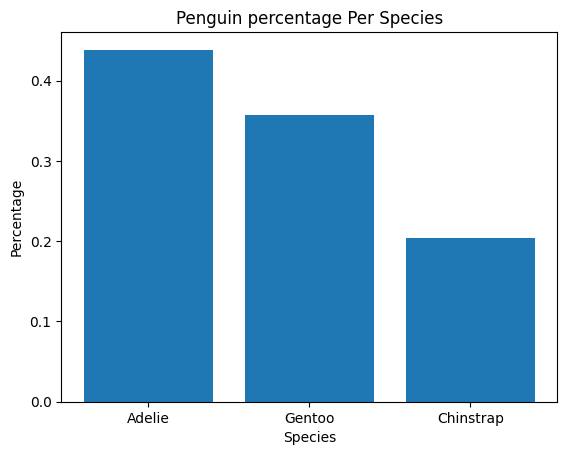

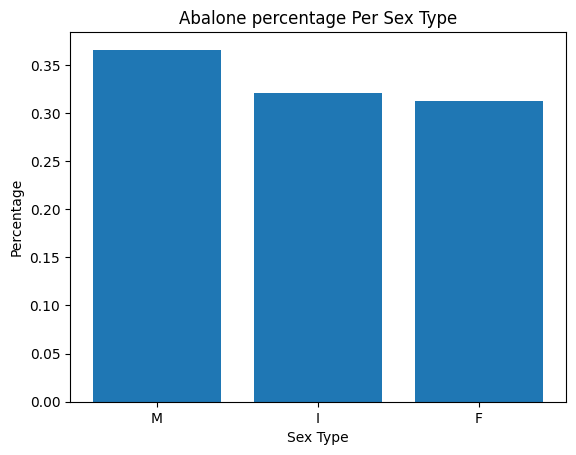

In [10]:
# Plot percentage of the instances in each output class and store the graphic in files called penguin-classes.gif and abalone-classes.gif
# How many belong to each species in the penguins dataset?
penguin_species_count = penguins_data['species'].value_counts()
penguin_species_percentage = penguin_species_count/len(penguins_data)

# How many belong to each sex type in the abalone dataset?
abalone_type_count = abalone_data['Type'].value_counts()
abalone_type_percentage = abalone_type_count/len(abalone_data)

print("Penguin percentage per species:")
print(penguin_species_percentage)
print()
print("Abalone percentage per sex type:")
print(abalone_type_percentage)

# Let's plot two bar graphs containing these values
# Penguins bar graph
plt.bar(penguin_species_percentage.index, penguin_species_percentage.values)
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.title('Penguin percentage Per Species')
plt.show()

# Abalone bar graph
plt.bar(abalone_type_percentage.index, abalone_type_percentage.values)
plt.xlabel('Sex Type')
plt.ylabel('Percentage')
plt.title('Abalone percentage Per Sex Type')
plt.show()


## 3.

In [11]:
# Split both datasets into train and test sets.
# Convert datasets to numpy arrays
np_penguin_data = penguins_encoded1.to_numpy()
np_abalone_data = abalone_data.to_numpy()

# Slice data to get labels in p_y and features in p_X
p_X = np_penguin_data[:,1:]
p_y = np_penguin_data[:,0]

# Slice data to get labels in a_y and features in a_X
a_X = np_abalone_data[:,1:]
a_y = np_abalone_data[:,0]

# Split data into train and test sets using the default parameter values.
p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

## 4.

### (a)

In [12]:
# Create Decision Tree object and train it on training sets

def create_base_DT_classifiers(X_train, Y_train) -> tree.DecisionTreeClassifier:
  base_DT = tree.DecisionTreeClassifier()
  base_DT.fit(X_train, Y_train)
  return base_DT

base_DT_penguins = create_base_DT_classifiers(p_X_train,p_y_train)

base_DT_abalone = create_base_DT_classifiers(a_X_train,a_y_train)

[Text(0.6527777777777778, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.643\nsamples = 249\nvalue = [103, 52, 94]'),
 Text(0.4722222222222222, 0.75, 'x[0] <= 44.65\ngini = 0.439\nsamples = 150\nvalue = [102, 47, 1]'),
 Text(0.2777777777777778, 0.5833333333333334, 'x[0] <= 42.3\ngini = 0.091\nsamples = 105\nvalue = [100, 5, 0]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[1] <= 16.65\ngini = 0.021\nsamples = 95\nvalue = [94, 1, 0]'),
 Text(0.1111111111111111, 0.25, 'x[0] <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2222222222222222, 0.25, 'gini = 0.0\nsamples = 87\nvalue = [87, 0, 0]'),
 Text(0.3888888888888889, 0.4166666666666667, 'x[2] <= 191.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 T

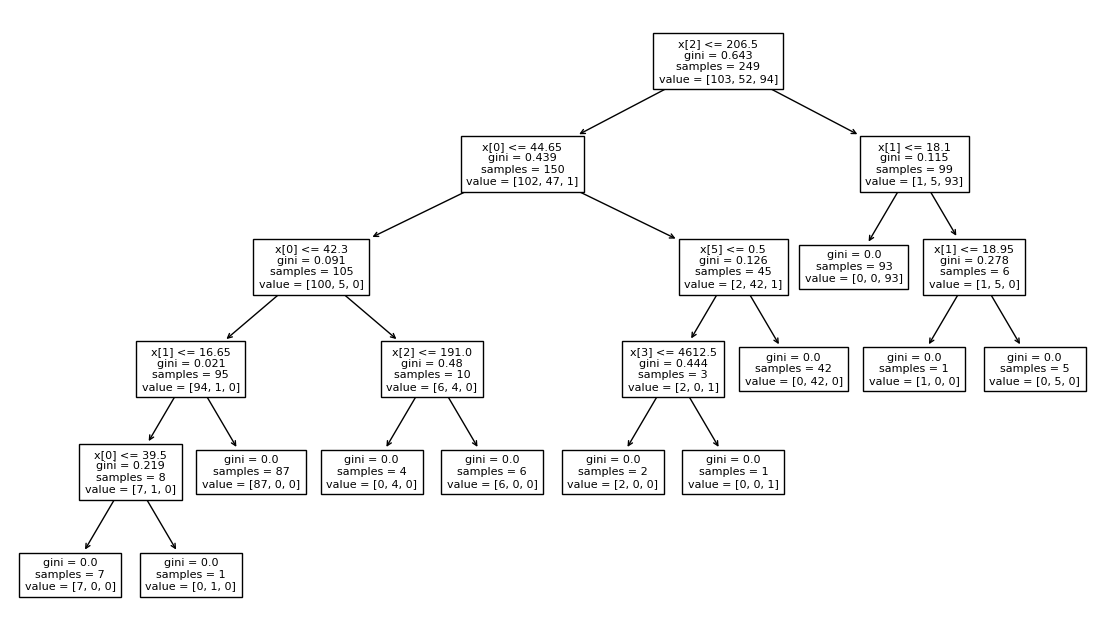

In [13]:
#Plot penguins tree
plt.figure(figsize=(14,8))
tree.plot_tree(base_DT_penguins, fontsize = 8)

[Text(0.5, 0.875, 'x[5] <= 0.144\ngini = 0.665\nsamples = 3132\nvalue = [975, 1008, 1149]'),
 Text(0.25, 0.625, 'x[7] <= 8.5\ngini = 0.528\nsamples = 1283\nvalue = [193, 815, 275]'),
 Text(0.125, 0.375, 'x[6] <= 0.128\ngini = 0.359\nsamples = 840\nvalue = [63, 659, 118]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[7] <= 9.5\ngini = 0.664\nsamples = 443\nvalue = [130, 156, 157]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[3] <= 0.945\ngini = 0.587\nsamples = 1849\nvalue = [782, 193, 874]'),
 Text(0.625, 0.375, 'x[7] <= 11.5\ngini = 0.644\nsamples = 633\nvalue = [209, 144, 280]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[4] <= 0.892\ngini = 0.538\nsamples = 1216\nvalue = [573, 49, 594]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

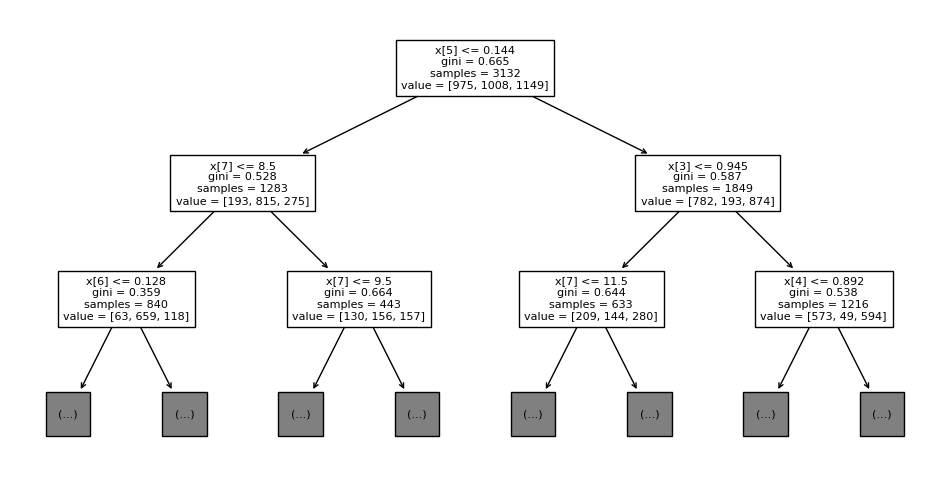

In [14]:
# Plot abalones tree
plt.figure(figsize=(12,6))
tree.plot_tree(base_DT_abalone, max_depth= 2, fontsize = 8)

### (b)

In [15]:
# Use GridSearchCV to find the best hyperparameters for 'criterion', 'max_depth', and 'min_samples_split'

def create_top_DT_classifier(X_train, Y_train) -> GridSearchCV:
  # The DT object
  DT =  tree.DecisionTreeClassifier()
  # The parameters in question
  parameters = {'criterion': ('gini','entropy'), 'max_depth': [3,10, None], 'min_samples_split': [2,6,12]}
  # The GridSearch Object
  top_DT = GridSearchCV(DT, parameters)
  # The training
  top_DT.fit(X_train,Y_train)
  return top_DT

# For the penguins:
top_DT_penguins = create_top_DT_classifier(p_X_train,p_y_train)

# For the abalone:
top_DT_abalone = create_top_DT_classifier(a_X_train,a_y_train)

[Text(0.6527777777777778, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.643\nsamples = 249\nvalue = [103, 52, 94]'),
 Text(0.4722222222222222, 0.75, 'x[0] <= 44.65\ngini = 0.439\nsamples = 150\nvalue = [102, 47, 1]'),
 Text(0.2777777777777778, 0.5833333333333334, 'x[0] <= 42.3\ngini = 0.091\nsamples = 105\nvalue = [100, 5, 0]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[1] <= 16.65\ngini = 0.021\nsamples = 95\nvalue = [94, 1, 0]'),
 Text(0.1111111111111111, 0.25, 'x[0] <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2222222222222222, 0.25, 'gini = 0.0\nsamples = 87\nvalue = [87, 0, 0]'),
 Text(0.3888888888888889, 0.4166666666666667, 'x[2] <= 191.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 T

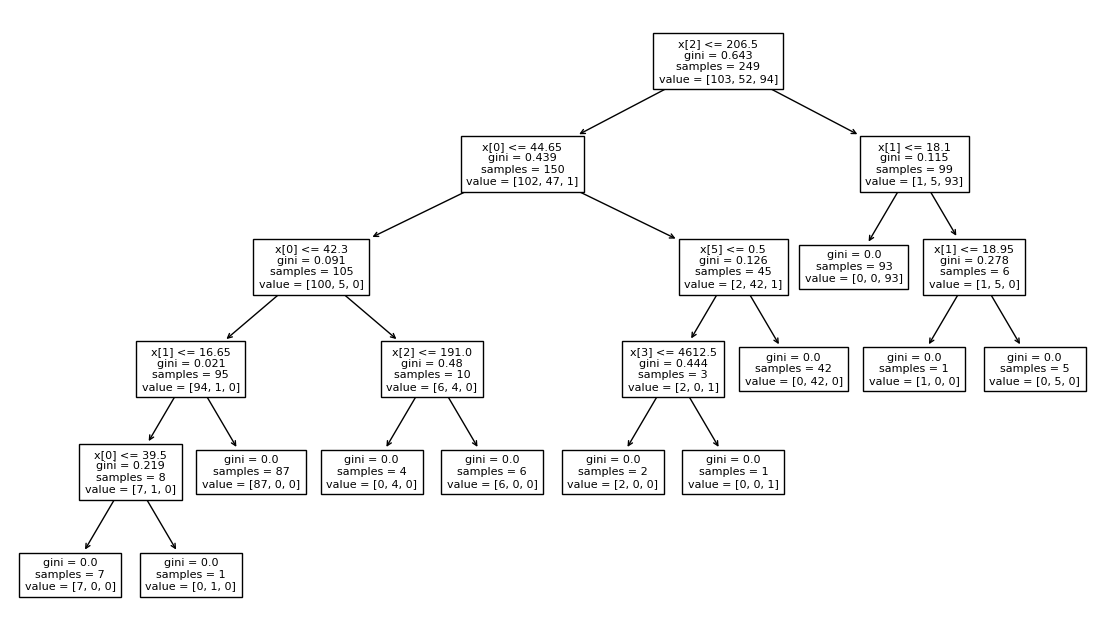

In [16]:
#Plot penguins tree
plt.figure(figsize=(14,8))
tree.plot_tree(base_DT_penguins, fontsize = 8)

[Text(0.5306372549019608, 0.9285714285714286, 'x[5] <= 0.144\ngini = 0.665\nsamples = 3132\nvalue = [975, 1008, 1149]'),
 Text(0.27205882352941174, 0.7857142857142857, 'x[7] <= 8.5\ngini = 0.528\nsamples = 1283\nvalue = [193, 815, 275]'),
 Text(0.13480392156862744, 0.6428571428571429, 'x[6] <= 0.128\ngini = 0.359\nsamples = 840\nvalue = [63, 659, 118]'),
 Text(0.07352941176470588, 0.5, 'x[2] <= 0.113\ngini = 0.271\nsamples = 622\nvalue = [28, 526, 68]'),
 Text(0.0392156862745098, 0.35714285714285715, 'x[0] <= 0.463\ngini = 0.242\nsamples = 558\nvalue = [19, 482, 57]'),
 Text(0.0196078431372549, 0.21428571428571427, 'x[4] <= 0.155\ngini = 0.235\nsamples = 548\nvalue = [19, 476, 53]'),
 Text(0.00980392156862745, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.029411764705882353, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.058823529411764705, 0.21428571428571427, 'x[3] <= 0.423\ngini = 0.48\nsamples = 10\nvalue = [0, 6, 4]'),
 Text(0.049019607843137254, 0.07142857142857142, '\n  (...)  

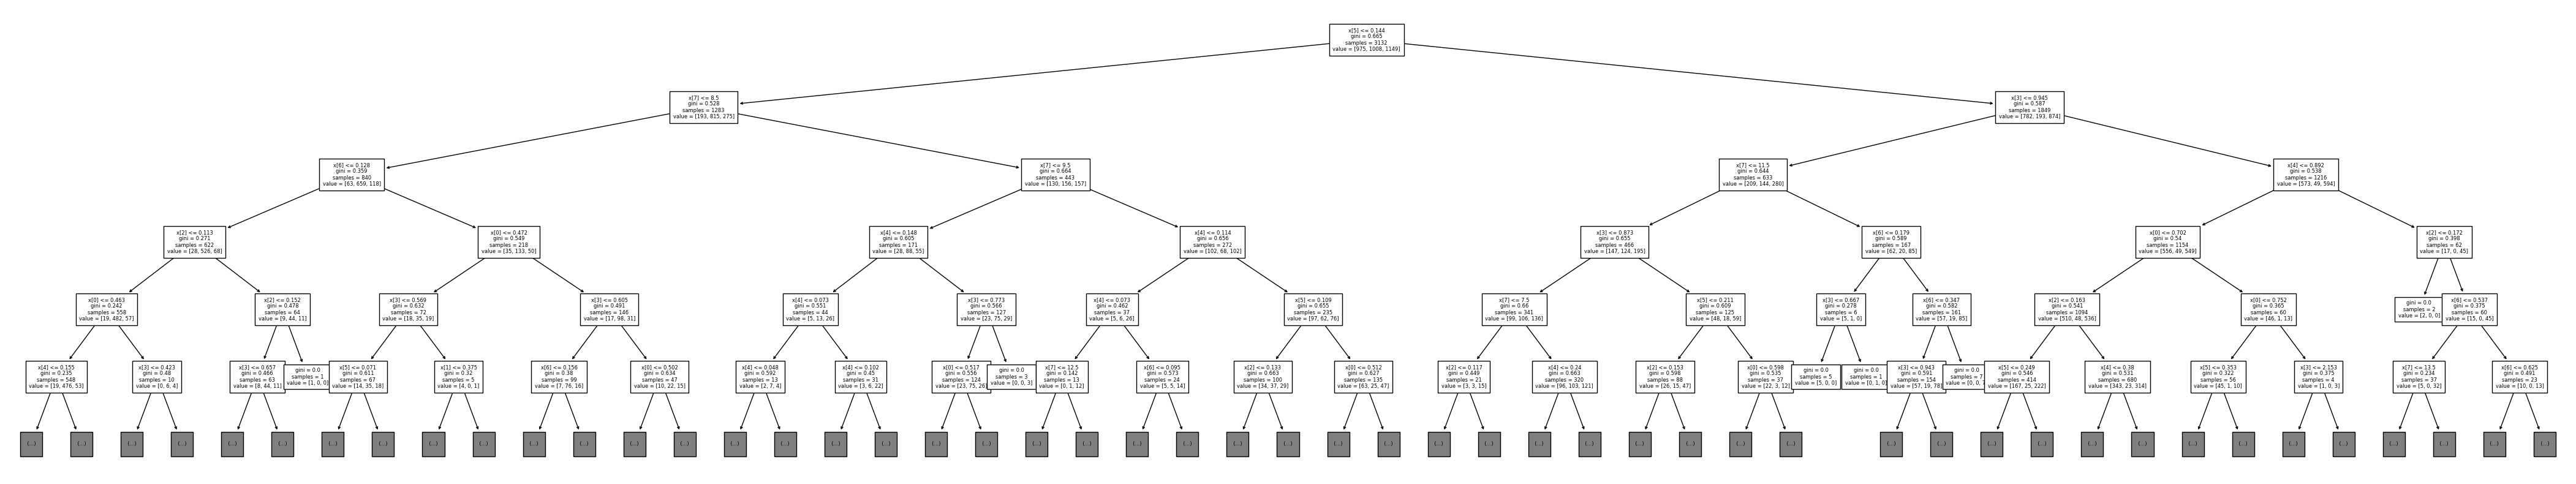

In [17]:
# Plot abalone tree
plt.figure(figsize=(54,10))
tree.plot_tree(base_DT_abalone, max_depth= 5, fontsize = 6)

### (c)

In [18]:
# Train a base MLP on the penguins and abalone datasets with:
# 2 hidden layers, 100 neurons each, sigmoid and logistic activation functions and SGD.

def create_base_MLP_classifier(X_train, Y_train) -> MLPClassifier:
  base_MLP = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', solver='sgd')
  base_MLP = base_MLP.fit(X_train,Y_train)
  return base_MLP

#TODO: create different training sets
base_MLP_penguins = create_base_MLP_classifier(p_X_train,p_y_train)

base_MLP_abalone = create_base_MLP_classifier(a_X_train,a_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### (d)

In [19]:
# Use GridSearchCV to find the best hyperparameters for 'criterion', 'max_depth', and 'min_samples_split'

def create_top_MLP_classifier(X_train,Y_train):
  # The MLP object
  MLP =  MLPClassifier()
  # The parameters in question
  parameters = {'activation': ['logistic', 'tanh','relu'], 'hidden_layer_sizes': [(30,25,10), (150,75)], 'solver': ['adam', 'sgd']}
  # The GridSearch Object
  top_MLP = GridSearchCV(MLP, parameters)
  # The training
  top_MLP.fit(X_train,Y_train)
  return top_MLP

# For the penguins:
top_MLP_penguins = create_top_MLP_classifier(p_X_train,p_y_train)

# For the abalones:
top_MLP_abalones = create_top_MLP_classifier(p_X_train,p_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

## 5.

### (a)

In [20]:
p_y_pred  = base_DT_penguins.predict(p_X_test)

#A)
base_dt_params = base_DT_penguins.get_params()

###!!!NEED FIX!!!###
#base_dt_penguins_info = "Base Decision Tree (criterion: " + str(base_dt_params.get('criterion')) + "---max_depth: " + base_dt_params.get('max_depth') + "---min_samples_split: " + base_dt_params.get('min_samples_split') + ")"


#B) Confusion Matrix
labels = unique_labels(p_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(p_y_test, p_y_pred), columns=column, index=indices)
print("Confusion Matrix:\n", table)
#print("\nBase DT Confusion Maxtrix for Penguins:\n", confusion_matrix(p_y_test, p_y_pred))


#C) Precision, Recall and F1_measure
penguin_report = classification_report(p_y_test, p_y_pred)
print("\nBase DT Classification_report for Penguins:\n", penguin_report)

penguin_report = classification_report(p_y_test, p_y_pred, output_dict=True)
#print("\nBase DT Classification_report for Penguins:\n", penguin_report)
#print(penguin_report.get('Adelie',{}).get('f1-score'))

BaseDT_Adelie_precision = penguin_report.get('Adelie',{}).get('precision')
BaseDT_Adelie_recall =    penguin_report.get('Adelie',{}).get('recall')
BaseDT_Adelie_f1score =   penguin_report.get('Adelie',{}).get('f1-score')

BaseDT_Chinstrap_precision =  penguin_report.get('Chinstrap',{}).get('precision')
BaseDT_Chinstrap_recall =     penguin_report.get('Chinstrap',{}).get('recall')
BaseDT_Chinstrap_f1score =    penguin_report.get('Chinstrap',{}).get('f1-score')

BaseDT_Gentoo_precision = penguin_report.get('Gentoo',{}).get('precision')
BaseDT_Gentoo_recall =    penguin_report.get('Gentoo',{}).get('recall')
BaseDT_Gentoo_f1score =   penguin_report.get('Gentoo',{}).get('f1-score')


text = "\nBase DT Classification Report for Penguins\n=Precision=\nAdelie:      " + str(BaseDT_Adelie_precision)
text += "\nChinstrap:   " + str(BaseDT_Chinstrap_precision)
text += "\nGentoo:      " + str(BaseDT_Gentoo_precision)

text += "\n\n=Recall=\nAdelie:      " + str(BaseDT_Adelie_recall)
text += "\nChinstrap:   " + str(BaseDT_Chinstrap_recall)
text += "\nGentoo:      " + str(BaseDT_Gentoo_recall)

text += "\n\n=F1-score=\nAdelie:      " + str(BaseDT_Adelie_f1score)
text += "\nChinstrap:   " + str(BaseDT_Chinstrap_f1score)
text += "\nGentoo:      " + str(BaseDT_Gentoo_f1score)




#D) Accuracy, macro-average F1m weighted-average F1 of the model
BaseDT_p_accuracy = penguin_report.get('accuracy',{})
BaseDT_macroavg_precision = penguin_report.get('macro avg',{}).get('precision')
BaseDT_macroavg_recall =    penguin_report.get('macro avg',{}).get('recall')
BaseDT_macroavg_f1score =   penguin_report.get('macro avg',{}).get('f1-score')

BaseDT_weightedavg_precision =  penguin_report.get('weighted avg',{}).get('precision')
BaseDT_weightedavg_recall =     penguin_report.get('weighted avg',{}).get('recall')
BaseDT_weightedavg_f1score =    penguin_report.get('weighted avg',{}).get('f1-score')

text += "\n\nAccuracy:     " + str(BaseDT_p_accuracy)
text += "\n\n=Precision=\nMacro avg:       " + str(BaseDT_macroavg_precision)
text += "\nWeighted avg:    " + str(BaseDT_weightedavg_precision)

text += "\n\n=Recall=\nMacro avg:     " + str(BaseDT_macroavg_recall)
text += "\nWeighted avg:  " + str(BaseDT_weightedavg_recall)

text += "\n\n=F1-Score=\nMacro avg:     " + str(BaseDT_macroavg_f1score)
text += "\nWeighted avg:  " + str(BaseDT_weightedavg_f1score)

print(text)



Confusion Matrix:
                  PredictedAdelie  PredictedChinstrap  PredictedGentoo
ActualAdelie                  42                   0                1
ActualChinstrap                1                  15                0
ActualGentoo                   0                   0               25

Base DT Classification_report for Penguins:
               precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        43
   Chinstrap       1.00      0.94      0.97        16
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.98        84
   macro avg       0.98      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84


Base DT Classification Report for Penguins
=Precision=
Adelie:      0.9767441860465116
Chinstrap:   1.0
Gentoo:      0.9615384615384616

=Recall=
Adelie:      0.9767441860465116
Chinstrap:   0.9375
Gentoo:      1.0

=F1-score=
Adelie:      0.9767441860465116
Chinstrap:   0

In [21]:
a_y_pred  = base_DT_abalone.predict(a_X_test)

#A)
base_dt_params = base_DT_abalone.get_params()
###!!!NEED FIX!!!###
#base_dt_abalone_info = "Base Decision Tree (criterion: " + str(base_dt_params.get('criterion')) + "---max_depth: " + base_dt_params.get('max_depth') + "---min_samples_split: " + base_dt_params.get('min_samples_split') + ")"


#B) Confusion Matrix
labels = unique_labels(a_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(a_y_test, a_y_pred), columns=column, index=indices)
print("Base DT Confusion Matrix for Abalones:\n", table)

print("Confusion Matrix:\n", confusion_matrix(a_y_test, a_y_pred))


#C) Precision, Recall and F1_measure
print("\nBase DT Classification Report for Abalones:\n",classification_report(a_y_test, a_y_pred))
abalone_report = classification_report(a_y_test, a_y_pred, output_dict=True)

BaseDT_F_precision =  abalone_report.get('F',{}).get('precision')
BaseDT_F_recall =     abalone_report.get('F',{}).get('recall')
BaseDT_F_f1score =    abalone_report.get('F',{}).get('f1-score')

BaseDT_I_precision =  abalone_report.get('I',{}).get('precision')
BaseDT_I_recall =     abalone_report.get('I',{}).get('recall')
BaseDT_I_f1score =    abalone_report.get('I',{}).get('f1-score')

BaseDT_M_precision =  abalone_report.get('M',{}).get('precision')
BaseDT_M_recall =     abalone_report.get('M',{}).get('recall')
BaseDT_M_f1score =    abalone_report.get('M',{}).get('f1-score')

text2 = "\nBase DT Classification Report for Abalone\n=Precision=\nF:      " + str(BaseDT_F_precision)
text2 += "\nI:   " + str(BaseDT_I_precision)
text2 += "\nM:      " + str(BaseDT_M_precision)

text2 += "\n\n=Recall=\nF:      " + str(BaseDT_F_recall)
text2 += "\nI:   " + str(BaseDT_I_recall)
text2 += "\nM:      " + str(BaseDT_M_recall)

text2 += "\n\n=F1-score=\nF:      " + str(BaseDT_F_f1score)
text2 += "\nI:   " + str(BaseDT_I_f1score)
text2 += "\nM:      " + str(BaseDT_M_f1score)




#D) Accuracy, macro-average F1m weighted-average F1 of the model
BaseDT_a_accuracy = abalone_report.get('accuracy',{})
BaseDT_a_macroavg_precision = abalone_report.get('macro avg',{}).get('precision')
BaseDT_a_macroavg_recall =    abalone_report.get('macro avg',{}).get('recall')
BaseDT_a_macroavg_f1score =   abalone_report.get('macro avg',{}).get('f1-score')

BaseDT_a_weightedavg_precision =  abalone_report.get('weighted avg',{}).get('precision')
BaseDT_a_weightedavg_recall =     abalone_report.get('weighted avg',{}).get('recall')
BaseDT_a_weightedavg_f1score =    abalone_report.get('weighted avg',{}).get('f1-score')

text2 += "\n\nAccuracy:     " + str(BaseDT_a_accuracy)
text2 += "\n\n=Precision=\nMacro avg:       " + str(BaseDT_a_macroavg_precision)
text2 += "\nWeighted avg:    " + str(BaseDT_a_weightedavg_precision)

text2 += "\n\n=Recall=\nMacro avg:     " + str(BaseDT_a_macroavg_recall)
text2 += "\nWeighted avg:  " + str(BaseDT_a_weightedavg_recall)

text2 += "\n\n=F1-Score=\nMacro avg:     " + str(BaseDT_a_macroavg_f1score)
text2 += "\nWeighted avg:  " + str(BaseDT_a_weightedavg_f1score)

print(text2)







Base DT Confusion Matrix for Abalones:
          PredictedF  PredictedI  PredictedM
ActualF         142          47         143
ActualI          51         224          59
ActualM         133          71         175
Confusion Matrix:
 [[142  47 143]
 [ 51 224  59]
 [133  71 175]]

Base DT Classification Report for Abalones:
               precision    recall  f1-score   support

           F       0.44      0.43      0.43       332
           I       0.65      0.67      0.66       334
           M       0.46      0.46      0.46       379

    accuracy                           0.52      1045
   macro avg       0.52      0.52      0.52      1045
weighted avg       0.52      0.52      0.52      1045


Base DT Classification Report for Abalone
=Precision=
F:      0.43558282208588955
I:   0.6549707602339181
M:      0.46419098143236076

=Recall=
F:      0.42771084337349397
I:   0.6706586826347305
M:      0.46174142480211083

=F1-score=
F:      0.4316109422492401
I:   0.6627218934911242
M:  

### (b)

In [22]:
top_DT_p_y_pred  = top_DT_penguins.predict(p_X_test)

#A)
top_dt_params = top_DT_penguins.get_params()
###!!!NEED FIX!!!###
#top_dt_penguins_info = "Top Decision Tree (criterion: " + str(top_dt_params.get('criterion')) + "---max_depth: " + top_dt_params.get('max_depth') + "---min_samples_split: " + top_dt_params.get('min_samples_split') + ")"



#B) Confusion Matrix
labels = unique_labels(p_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(p_y_test, top_DT_p_y_pred), columns=column, index=indices)
print("Top DT Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nTop DT Classification Report for Penguins:\n", classification_report(p_y_test, top_DT_p_y_pred))
top_DT_penguin_report = classification_report(p_y_test, top_DT_p_y_pred, output_dict=True)

top_DT_Adelie_precision = top_DT_penguin_report.get('Adelie',{}).get('precision')
top_DT_Adelie_recall =    top_DT_penguin_report.get('Adelie',{}).get('recall')
top_DT_Adelie_f1score =   top_DT_penguin_report.get('Adelie',{}).get('f1-score')

top_DT_Chinstrap_precision =  top_DT_penguin_report.get('Chinstrap',{}).get('precision')
top_DT_Chinstrap_recall =     top_DT_penguin_report.get('Chinstrap',{}).get('recall')
top_DT_Chinstrap_f1score =    top_DT_penguin_report.get('Chinstrap',{}).get('f1-score')

top_DT_Gentoo_precision = top_DT_penguin_report.get('Gentoo',{}).get('precision')
top_DT_Gentoo_recall =    top_DT_penguin_report.get('Gentoo',{}).get('recall')
top_DT_Gentoo_f1score =   top_DT_penguin_report.get('Gentoo',{}).get('f1-score')


text3 = "\nBase DT Classification Report for Penguins\n=Precision=\nAdelie:      " + str(top_DT_Adelie_precision)
text3 += "\nChinstrap:   " + str(top_DT_Chinstrap_precision)
text3 += "\nGentoo:      " + str(top_DT_Gentoo_precision)

text3 += "\n\n=Recall=\nAdelie:      " + str(top_DT_Adelie_recall)
text3 += "\nChinstrap:   " + str(top_DT_Chinstrap_recall)
text3 += "\nGentoo:      " + str(top_DT_Gentoo_recall)

text3 += "\n\n=F1-score=\nAdelie:      " + str(top_DT_Adelie_f1score)
text3 += "\nChinstrap:   " + str(top_DT_Chinstrap_f1score)
text3 += "\nGentoo:      " + str(top_DT_Gentoo_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
top_DT_p_accuracy = top_DT_penguin_report.get('accuracy',{})
top_DT_macroavg_precision = top_DT_penguin_report.get('macro avg',{}).get('precision')
top_DT_macroavg_recall =    top_DT_penguin_report.get('macro avg',{}).get('recall')
top_DT_macroavg_f1score =   top_DT_penguin_report.get('macro avg',{}).get('f1-score')

top_DT_weightedavg_precision =  top_DT_penguin_report.get('weighted avg',{}).get('precision')
top_DT_weightedavg_recall =     top_DT_penguin_report.get('weighted avg',{}).get('recall')
top_DT_weightedavg_f1score =    top_DT_penguin_report.get('weighted avg',{}).get('f1-score')

text3 += "\n\nAccuracy:     " + str(top_DT_p_accuracy)
text3 += "\n\n=Precision=\nMacro avg:       " + str(top_DT_macroavg_precision)
text3 += "\nWeighted avg:    " + str(top_DT_weightedavg_precision)

text3 += "\n\n=Recall=\nMacro avg:     " + str(top_DT_macroavg_recall)
text3 += "\nWeighted avg:  " + str(top_DT_weightedavg_recall)

text3 += "\n\n=F1-Score=\nMacro avg:     " + str(top_DT_macroavg_f1score)
text3 += "\nWeighted avg:  " + str(top_DT_weightedavg_f1score)

print(text3)


Top DT Confusion Matrix for Penguins:
                  PredictedAdelie  PredictedChinstrap  PredictedGentoo
ActualAdelie                  42                   0                1
ActualChinstrap                0                  16                0
ActualGentoo                   0                   0               25

Top DT Classification Report for Penguins:
               precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        43
   Chinstrap       1.00      1.00      1.00        16
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84


Base DT Classification Report for Penguins
=Precision=
Adelie:      1.0
Chinstrap:   1.0
Gentoo:      0.9615384615384616

=Recall=
Adelie:      0.9767441860465116
Chinstrap:   1.0
Gentoo:      1.0

=F1-score=
Adelie:      0.988235294117647
Chinstrap:   1

In [23]:
top_DT_a_y_pred  = top_DT_abalone.predict(a_X_test)


#A)
top_dt_params = top_DT_abalone.get_params()
###!!!NEED FIX!!!###
#top_dt_abalone_info = "Top Decision Tree (criterion: " + str(top_dt_params.get('criterion')) + "---max_depth: " + top_dt_params.get('max_depth') + "---min_samples_split: " + top_dt_params.get('min_samples_split') + ")"

#B) Confusion Matrix
labels = unique_labels(a_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(a_y_test, top_DT_a_y_pred), columns=column, index=indices)
print("Top DT Confusion Matrix for Abalones:\n", table)
print("Confusion Matrix:\n", confusion_matrix(a_y_test, top_DT_a_y_pred))


#C) Precision, Recall and F1_measure
print("\nTop DT Classification Report for Abalones:\n", classification_report(a_y_test, top_DT_a_y_pred))
top_DT_abalone_report = classification_report(a_y_test, top_DT_a_y_pred, output_dict=True)

top_DT_F_precision =  top_DT_abalone_report.get('F',{}).get('precision')
top_DT_F_recall =     top_DT_abalone_report.get('F',{}).get('recall')
top_DT_F_f1score =    top_DT_abalone_report.get('F',{}).get('f1-score')

top_DT_I_precision =  top_DT_abalone_report.get('I',{}).get('precision')
top_DT_I_recall =     top_DT_abalone_report.get('I',{}).get('recall')
top_DT_I_f1score =    top_DT_abalone_report.get('I',{}).get('f1-score')

top_DT_M_precision =  top_DT_abalone_report.get('M',{}).get('precision')
top_DT_M_recall =     top_DT_abalone_report.get('M',{}).get('recall')
top_DT_M_f1score =    top_DT_abalone_report.get('M',{}).get('f1-score')

text4 = "\nTop DT Classification Report for Abalone\n=Precision=\nF:        " + str(top_DT_F_precision)
text4 += "\nI:        " + str(top_DT_I_precision)
text4 += "\nM:        " + str(top_DT_M_precision)

text4 += "\n\n=Recall=\nF:        " + str(top_DT_F_recall)
text4 += "\nI:        " + str(top_DT_I_recall)
text4 += "\nM:        " + str(top_DT_M_recall)

text4 += "\n\n=F1-score=\nF:        " + str(top_DT_F_f1score)
text4 += "\nI:        " + str(top_DT_I_f1score)
text4 += "\nM:        " + str(top_DT_M_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
top_DT_a_accuracy = top_DT_abalone_report.get('accuracy',{})
top_DT_a_macroavg_precision = top_DT_abalone_report.get('macro avg',{}).get('precision')
top_DT_a_macroavg_recall =    top_DT_abalone_report.get('macro avg',{}).get('recall')
top_DT_a_macroavg_f1score =   top_DT_abalone_report.get('macro avg',{}).get('f1-score')

top_DT_a_weightedavg_precision =  top_DT_abalone_report.get('weighted avg',{}).get('precision')
top_DT_a_weightedavg_recall =     top_DT_abalone_report.get('weighted avg',{}).get('recall')
top_DT_a_weightedavg_f1score =    top_DT_abalone_report.get('weighted avg',{}).get('f1-score')

text4 += "\n\nAccuracy:     " + str(top_DT_a_accuracy)
text4 += "\n\n=Precision=\nMacro avg:       " + str(top_DT_a_macroavg_precision)
text4 += "\nWeighted avg:    " + str(top_DT_a_weightedavg_precision)

text4 += "\n\n=Recall=\nMacro avg:     " + str(top_DT_a_macroavg_recall)
text4 += "\nWeighted avg:  " + str(top_DT_a_weightedavg_recall)

text4 += "\n\n=F1-Score=\nMacro avg:     " + str(top_DT_a_macroavg_f1score)
text4 += "\nWeighted avg:  " + str(top_DT_a_weightedavg_f1score)

print(text4)

Top DT Confusion Matrix for Abalones:
          PredictedF  PredictedI  PredictedM
ActualF         119          33         180
ActualI          35         243          56
ActualM         111          66         202
Confusion Matrix:
 [[119  33 180]
 [ 35 243  56]
 [111  66 202]]

Top DT Classification Report for Abalones:
               precision    recall  f1-score   support

           F       0.45      0.36      0.40       332
           I       0.71      0.73      0.72       334
           M       0.46      0.53      0.49       379

    accuracy                           0.54      1045
   macro avg       0.54      0.54      0.54      1045
weighted avg       0.54      0.54      0.54      1045


Top DT Classification Report for Abalone
=Precision=
F:        0.4490566037735849
I:        0.7105263157894737
M:        0.4611872146118721

=Recall=
F:        0.35843373493975905
I:        0.7275449101796407
M:        0.5329815303430079

=F1-score=
F:        0.39865996649916247
I:        0.7

### (c)

In [24]:
base_mlp_p_y_pred  = base_MLP_penguins.predict(p_X_test)

#A)
base_mlp_params = base_MLP_penguins.get_params()
###!!!NEED FIX!!!###
#base_mlp_penguins_info = "Base MLP (network architecture: " + str(base_mlp_params.get('hidden_layer_sizes')) + "---activation: " + base_mlp_params.get('activation') + "---solver: " + base_mlp_params.get('solver') + ")"


#B) Confusion Matrix
labels = unique_labels(p_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(p_y_test, base_mlp_p_y_pred), columns=column, index=indices)
print("Base MLP Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nBase MLP Classification Report for Penguins:\n", classification_report(p_y_test, base_mlp_p_y_pred))
base_mlp_penguin_report = classification_report(p_y_test, base_mlp_p_y_pred, output_dict=True)

base_mlp_Adelie_precision = base_mlp_penguin_report.get('Adelie',{}).get('precision')
base_mlp_Adelie_recall =    base_mlp_penguin_report.get('Adelie',{}).get('recall')
base_mlp_Adelie_f1score =   base_mlp_penguin_report.get('Adelie',{}).get('f1-score')

base_mlp_Chinstrap_precision =  base_mlp_penguin_report.get('Chinstrap',{}).get('precision')
base_mlp_Chinstrap_recall =     base_mlp_penguin_report.get('Chinstrap',{}).get('recall')
base_mlp_Chinstrap_f1score =    base_mlp_penguin_report.get('Chinstrap',{}).get('f1-score')

base_mlp_Gentoo_precision = base_mlp_penguin_report.get('Gentoo',{}).get('precision')
base_mlp_Gentoo_recall =    base_mlp_penguin_report.get('Gentoo',{}).get('recall')
base_mlp_Gentoo_f1score =   base_mlp_penguin_report.get('Gentoo',{}).get('f1-score')


text5 = "\nBase DT Classification Report for Penguins\n=Precision=\nAdelie:      " + str(base_mlp_Adelie_precision)
text5 += "\nChinstrap:   " + str(base_mlp_Chinstrap_precision)
text5 += "\nGentoo:      " + str(base_mlp_Gentoo_precision)

text5 += "\n\n=Recall=\nAdelie:      " + str(base_mlp_Adelie_recall)
text5 += "\nChinstrap:   " + str(base_mlp_Chinstrap_recall)
text5 += "\nGentoo:      " + str(base_mlp_Gentoo_recall)

text5 += "\n\n=F1-score=\nAdelie:      " + str(base_mlp_Adelie_f1score)
text5 += "\nChinstrap:   " + str(base_mlp_Chinstrap_f1score)
text5 += "\nGentoo:      " + str(base_mlp_Gentoo_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
base_mlp_p_accuracy = base_mlp_penguin_report.get('accuracy',{})
base_mlp_macroavg_precision = base_mlp_penguin_report.get('macro avg',{}).get('precision')
base_mlp_macroavg_recall =    base_mlp_penguin_report.get('macro avg',{}).get('recall')
base_mlp_macroavg_f1score =   base_mlp_penguin_report.get('macro avg',{}).get('f1-score')

base_mlp_weightedavg_precision =  base_mlp_penguin_report.get('weighted avg',{}).get('precision')
base_mlp_weightedavg_recall =     base_mlp_penguin_report.get('weighted avg',{}).get('recall')
base_mlp_weightedavg_f1score =    base_mlp_penguin_report.get('weighted avg',{}).get('f1-score')

text5 += "\n\nAccuracy:     " + str(base_mlp_p_accuracy)
text5 += "\n\n=Precision=\nMacro avg:       " + str(base_mlp_macroavg_precision)
text5 += "\nWeighted avg:    " + str(base_mlp_weightedavg_precision)

text5 += "\n\n=Recall=\nMacro avg:     " + str(base_mlp_macroavg_recall)
text5 += "\nWeighted avg:  " + str(base_mlp_weightedavg_recall)

text5 += "\n\n=F1-Score=\nMacro avg:     " + str(base_mlp_macroavg_f1score)
text5 += "\nWeighted avg:  " + str(base_mlp_weightedavg_f1score)

print(text5)










Base MLP Confusion Matrix for Penguins:
                  PredictedAdelie  PredictedChinstrap  PredictedGentoo
ActualAdelie                  43                   0                0
ActualChinstrap               16                   0                0
ActualGentoo                  25                   0                0

Base MLP Classification Report for Penguins:
               precision    recall  f1-score   support

      Adelie       0.51      1.00      0.68        43
   Chinstrap       0.00      0.00      0.00        16
      Gentoo       0.00      0.00      0.00        25

    accuracy                           0.51        84
   macro avg       0.17      0.33      0.23        84
weighted avg       0.26      0.51      0.35        84


Base DT Classification Report for Penguins
=Precision=
Adelie:      0.5119047619047619
Chinstrap:   0.0
Gentoo:      0.0

=Recall=
Adelie:      1.0
Chinstrap:   0.0
Gentoo:      0.0

=F1-score=
Adelie:      0.6771653543307087
Chinstrap:   0.0
Gentoo:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [25]:
base_mlp_a_y_pred  = base_MLP_abalone.predict(a_X_test)

#A)
base_mlp_params = base_MLP_abalone.get_params()
###!!!NEED FIX!!!###
#base_mlp_abalone_info = "Base MLP (network architecture: " + str(base_mlp_params.get('hidden_layer_sizes')) + "---activation: " + base_mlp_params.get('activation') + "---solver: " + base_mlp_params.get('solver') + ")"


#B) Confusion Matrix
labels = unique_labels(a_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(a_y_test, base_mlp_a_y_pred), columns=column, index=indices)
print("Base MLP Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nBase MLP Classification Report for Abalones:\n", classification_report(a_y_test, base_mlp_a_y_pred))
base_mlp_abalone_report = classification_report(a_y_test, base_mlp_a_y_pred, output_dict=True)

base_mlp_F_precision = base_mlp_abalone_report.get('F',{}).get('precision')
base_mlp_F_recall =    base_mlp_abalone_report.get('F',{}).get('recall')
base_mlp_F_f1score =   base_mlp_abalone_report.get('F',{}).get('f1-score')

base_mlp_I_precision =  base_mlp_abalone_report.get('I',{}).get('precision')
base_mlp_I_recall =     base_mlp_abalone_report.get('I',{}).get('recall')
base_mlp_I_f1score =    base_mlp_abalone_report.get('I',{}).get('f1-score')

base_mlp_M_precision = base_mlp_abalone_report.get('M',{}).get('precision')
base_mlp_M_recall =    base_mlp_abalone_report.get('M',{}).get('recall')
base_mlp_M_f1score =   base_mlp_abalone_report.get('M',{}).get('f1-score')


text6 = "\nBase DT Classification Report for Penguins\n=Precision=\nF:      " + str(base_mlp_F_precision)
text6 += "\nI:   " + str(base_mlp_I_precision)
text6 += "\nM:      " + str(base_mlp_M_precision)

text6 += "\n\n=Recall=\nF:      " + str(base_mlp_F_recall)
text6 += "\nI:   " + str(base_mlp_I_recall)
text6 += "\nM:      " + str(base_mlp_M_recall)

text6 += "\n\n=F1-score=\nF:      " + str(base_mlp_F_f1score)
text6 += "\nI:   " + str(base_mlp_I_f1score)
text6 += "\nM:      " + str(base_mlp_M_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
base_mlp_a_accuracy = base_mlp_abalone_report.get('accuracy',{})
base_mlp_a_macroavg_precision = base_mlp_abalone_report.get('macro avg',{}).get('precision')
base_mlp_a_macroavg_recall =    base_mlp_abalone_report.get('macro avg',{}).get('recall')
base_mlp_a_macroavg_f1score =   base_mlp_abalone_report.get('macro avg',{}).get('f1-score')

base_mlp_a_weightedavg_precision =  base_mlp_abalone_report.get('weighted avg',{}).get('precision')
base_mlp_a_weightedavg_recall =     base_mlp_abalone_report.get('weighted avg',{}).get('recall')
base_mlp_a_weightedavg_f1score =    base_mlp_abalone_report.get('weighted avg',{}).get('f1-score')

text6 += "\n\nAccuracy:     " + str(base_mlp_a_accuracy)
text6 += "\n\n=Precision=\nMacro avg:       " + str(base_mlp_a_macroavg_precision)
text6 += "\nWeighted avg:    " + str(base_mlp_a_weightedavg_precision)

text6 += "\n\n=Recall=\nMacro avg:     " + str(base_mlp_a_macroavg_recall)
text6 += "\nWeighted avg:  " + str(base_mlp_a_weightedavg_recall)

text6 += "\n\n=F1-Score=\nMacro avg:     " + str(base_mlp_a_macroavg_f1score)
text6 += "\nWeighted avg:  " + str(base_mlp_a_weightedavg_f1score)

print(text6)







Base MLP Confusion Matrix for Penguins:
          PredictedF  PredictedI  PredictedM
ActualF           0          22         310
ActualI           0         213         121
ActualM           0          54         325

Base MLP Classification Report for Abalones:
               precision    recall  f1-score   support

           F       0.00      0.00      0.00       332
           I       0.74      0.64      0.68       334
           M       0.43      0.86      0.57       379

    accuracy                           0.51      1045
   macro avg       0.39      0.50      0.42      1045
weighted avg       0.39      0.51      0.43      1045


Base DT Classification Report for Penguins
=Precision=
F:      0.0
I:   0.7370242214532872
M:      0.4298941798941799

=Recall=
F:      0.0
I:   0.6377245508982036
M:      0.8575197889182058

=F1-score=
F:      0.0
I:   0.6837881219903692
M:      0.5726872246696034

Accuracy:     0.5148325358851674

=Precision=
Macro avg:       0.3889728004491557
Weigh

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

### (d)

In [26]:
top_mlp_p_y_pred  = top_MLP_penguins.predict(p_X_test)

#A)
###!!!NEED FIX!!!###
#top_mlp_params = base_dt.get_params()
#top_mlp_penguins_info = "Top MLP (network architecture: " + str(top_mlp_params.get('hidden_layer_sizes')) + "---activation: " + top_mlp_params.get('activation') + "---solver: " + top_mlp_params.get('solver') + ")"


#B) Confusion Matrix
labels = unique_labels(p_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(p_y_test, top_mlp_p_y_pred), columns=column, index=indices)
print("Base MLP Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nBase MLP Classification Report for Penguins:\n", classification_report(p_y_test, top_mlp_p_y_pred))
top_mlp_penguin_report = classification_report(p_y_test, top_mlp_p_y_pred, output_dict=True)

top_mlp_Adelie_precision = top_mlp_penguin_report.get('Adelie',{}).get('precision')
top_mlp_Adelie_recall =    top_mlp_penguin_report.get('Adelie',{}).get('recall')
top_mlp_Adelie_f1score =   top_mlp_penguin_report.get('Adelie',{}).get('f1-score')

top_mlp_Chinstrap_precision =  top_mlp_penguin_report.get('Chinstrap',{}).get('precision')
top_mlp_Chinstrap_recall =     top_mlp_penguin_report.get('Chinstrap',{}).get('recall')
top_mlp_Chinstrap_f1score =    top_mlp_penguin_report.get('Chinstrap',{}).get('f1-score')

top_mlp_Gentoo_precision = top_mlp_penguin_report.get('Gentoo',{}).get('precision')
top_mlp_Gentoo_recall =    top_mlp_penguin_report.get('Gentoo',{}).get('recall')
top_mlp_Gentoo_f1score =   top_mlp_penguin_report.get('Gentoo',{}).get('f1-score')


text7 = "\nBase DT Classification Report for Penguins\n=Precision=\nAdelie:      " + str(top_mlp_Adelie_precision)
text7 += "\nChinstrap:   " + str(top_mlp_Chinstrap_precision)
text7 += "\nGentoo:      " + str(top_mlp_Gentoo_precision)

text7 += "\n\n=Recall=\nAdelie:      " + str(top_mlp_Adelie_recall)
text7 += "\nChinstrap:   " + str(top_mlp_Chinstrap_recall)
text7 += "\nGentoo:      " + str(top_mlp_Gentoo_recall)

text7 += "\n\n=F1-score=\nAdelie:      " + str(top_mlp_Adelie_f1score)
text7 += "\nChinstrap:   " + str(top_mlp_Chinstrap_f1score)
text7 += "\nGentoo:      " + str(top_mlp_Gentoo_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
top_mlp_p_accuracy = top_mlp_penguin_report.get('accuracy',{})
top_mlp_macroavg_precision = top_mlp_penguin_report.get('macro avg',{}).get('precision')
top_mlp_macroavg_recall =    top_mlp_penguin_report.get('macro avg',{}).get('recall')
top_mlp_macroavg_f1score =   top_mlp_penguin_report.get('macro avg',{}).get('f1-score')

top_mlp_weightedavg_precision =  top_mlp_penguin_report.get('weighted avg',{}).get('precision')
top_mlp_weightedavg_recall =     top_mlp_penguin_report.get('weighted avg',{}).get('recall')
top_mlp_weightedavg_f1score =    top_mlp_penguin_report.get('weighted avg',{}).get('f1-score')

text7 += "\n\nAccuracy:     " + str(top_mlp_p_accuracy)
text7 += "\n\n=Precision=\nMacro avg:       " + str(top_mlp_macroavg_precision)
text7 += "\nWeighted avg:    " + str(top_mlp_weightedavg_precision)

text7 += "\n\n=Recall=\nMacro avg:     " + str(top_mlp_macroavg_recall)
text7 += "\nWeighted avg:  " + str(top_mlp_weightedavg_recall)

text5 += "\n\n=F1-Score=\nMacro avg:     " + str(top_mlp_macroavg_f1score)
text7 += "\nWeighted avg:  " + str(top_mlp_weightedavg_f1score)

print(text7)






Base MLP Confusion Matrix for Penguins:
                  PredictedAdelie  PredictedChinstrap  PredictedGentoo
ActualAdelie                  40                   0                3
ActualChinstrap               16                   0                0
ActualGentoo                   0                   0               25

Base MLP Classification Report for Penguins:
               precision    recall  f1-score   support

      Adelie       0.71      0.93      0.81        43
   Chinstrap       0.00      0.00      0.00        16
      Gentoo       0.89      1.00      0.94        25

    accuracy                           0.77        84
   macro avg       0.54      0.64      0.58        84
weighted avg       0.63      0.77      0.69        84


Base DT Classification Report for Penguins
=Precision=
Adelie:      0.7142857142857143
Chinstrap:   0.0
Gentoo:      0.8928571428571429

=Recall=
Adelie:      0.9302325581395349
Chinstrap:   0.0
Gentoo:      1.0

=F1-score=
Adelie:      0.80808080808

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [27]:
top_mlp_a_y_pred  = base_MLP_abalone.predict(a_X_test)


#A)
###!!!NEED FIX!!!###
#top_mlp_params = base_dt.get_params()
#top_mlp_abalone_info = "Top MLP (network architecture: " + str(top_mlp_params.get('hidden_layer_sizes')) + "---activation: " + top_mlp_params.get('activation') + "---solver: " + top_mlp_params.get('solver') + ")"


#B) Confusion Matrix
labels = unique_labels(a_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(a_y_test, top_mlp_a_y_pred), columns=column, index=indices)
print("Base MLP Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nTop MLP Classification Report for Abalones:\n", classification_report(a_y_test, top_mlp_a_y_pred))
top_mlp_abalone_report = classification_report(a_y_test, top_mlp_a_y_pred, output_dict=True)

top_mlp_F_precision = top_mlp_abalone_report.get('F',{}).get('precision')
top_mlp_F_recall =    top_mlp_abalone_report.get('F',{}).get('recall')
top_mlp_F_f1score =   top_mlp_abalone_report.get('F',{}).get('f1-score')

top_mlp_I_precision =  top_mlp_abalone_report.get('I',{}).get('precision')
top_mlp_I_recall =     top_mlp_abalone_report.get('I',{}).get('recall')
top_mlp_I_f1score =    top_mlp_abalone_report.get('I',{}).get('f1-score')

top_mlp_M_precision = top_mlp_abalone_report.get('M',{}).get('precision')
top_mlp_M_recall =    top_mlp_abalone_report.get('M',{}).get('recall')
top_mlp_M_f1score =   top_mlp_abalone_report.get('M',{}).get('f1-score')


text8 = "\nTop MLP Classification Report for Abalones\n=Precision=\nF:      " + str(top_mlp_F_precision)
text8 += "\nI:   " + str(top_mlp_I_precision)
text8 += "\nM:      " + str(top_mlp_M_precision)

text8 += "\n\n=Recall=\nF:      " + str(top_mlp_F_recall)
text8 += "\nI:   " + str(top_mlp_I_recall)
text8 += "\nM:      " + str(top_mlp_M_recall)

text8 += "\n\n=F1-score=\nF:      " + str(top_mlp_F_f1score)
text8 += "\nI:   " + str(top_mlp_I_f1score)
text8 += "\nM:      " + str(top_mlp_M_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
top_mlp_a_accuracy = top_mlp_abalone_report.get('accuracy',{})
top_mlp_a_macroavg_precision = top_mlp_abalone_report.get('macro avg',{}).get('precision')
top_mlp_a_macroavg_recall =    top_mlp_abalone_report.get('macro avg',{}).get('recall')
top_mlp_a_macroavg_f1score =   top_mlp_abalone_report.get('macro avg',{}).get('f1-score')

top_mlp_a_weightedavg_precision =  top_mlp_abalone_report.get('weighted avg',{}).get('precision')
top_mlp_a_weightedavg_recall =     top_mlp_abalone_report.get('weighted avg',{}).get('recall')
top_mlp_a_weightedavg_f1score =    top_mlp_abalone_report.get('weighted avg',{}).get('f1-score')

text8 += "\n\nAccuracy:     " + str(top_mlp_a_accuracy)
text8 += "\n\n=Precision=\nMacro avg:       " + str(top_mlp_a_macroavg_precision)
text8 += "\nWeighted avg:    " + str(top_mlp_a_weightedavg_precision)

text8 += "\n\n=Recall=\nMacro avg:     " + str(top_mlp_a_macroavg_recall)
text8 += "\nWeighted avg:  " + str(top_mlp_a_weightedavg_recall)

text8 += "\n\n=F1-Score=\nMacro avg:     " + str(top_mlp_a_macroavg_f1score)
text8 += "\nWeighted avg:  " + str(top_mlp_a_weightedavg_f1score)

print(text8)






Base MLP Confusion Matrix for Penguins:
          PredictedF  PredictedI  PredictedM
ActualF           0          22         310
ActualI           0         213         121
ActualM           0          54         325

Top MLP Classification Report for Abalones:
               precision    recall  f1-score   support

           F       0.00      0.00      0.00       332
           I       0.74      0.64      0.68       334
           M       0.43      0.86      0.57       379

    accuracy                           0.51      1045
   macro avg       0.39      0.50      0.42      1045
weighted avg       0.39      0.51      0.43      1045



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Top MLP Classification Report for Abalones
=Precision=
F:      0.0
I:   0.7370242214532872
M:      0.4298941798941799

=Recall=
F:      0.0
I:   0.6377245508982036
M:      0.8575197889182058

=F1-score=
F:      0.0
I:   0.6837881219903692
M:      0.5726872246696034

Accuracy:     0.5148325358851674

=Precision=
Macro avg:       0.3889728004491557
Weighted avg:    0.39147941066535125

=Recall=
Macro avg:     0.49841477993880307
Weighted avg:  0.5148325358851674

=F1-Score=
Macro avg:     0.41882511555332425
Weighted avg:  0.42625233578427085


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6.

### (a)

In [47]:
ACCURACY = "accuracy"
MACRO_AVG_F1 = "macro_avg_f1",
WEIGHTED_AVG_F1 = "weighted_avg_f1"

with open("penguin-performance.txt", "a") as f_penguin:
   f_penguin.write##the bundled string


with open("abalone-performance.txt", "a") as f_abalone:
  f_abalone.write##the bundled string

#Base DT
penguins_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

abalone_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

def append_performance_data(report: (str | dict), performance_data: dict):
   performance_data[ACCURACY].append(report.get('accuracy',{}))
   performance_data[MACRO_AVG_F1].append(report.get('macro avg',{}).get('f1-score'))
   performance_data[WEIGHTED_AVG_F1].append(report.get('weighted avg',{}).get('f1-score'))

for _ in range(5):
   # Split data into train and test sets using the default parameter values.
   p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
   a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

   base_DT_penguins = create_base_DT_classifiers(p_X_train, p_y_train)
   base_DT_abalone = create_base_DT_classifiers(a_X_train, a_y_train)

   p_y_pred  = base_DT_penguins.predict(p_X_test)
   penguin_report = classification_report(p_y_test, p_y_pred, output_dict=True)

   a_y_pred  = base_DT_abalone.predict(a_X_test)
   abalone_report = classification_report(a_y_test, a_y_pred, output_dict=True)

   append_performance_data(penguin_report, penguins_performance_data)
   append_performance_data(abalone_report, abalone_performance_data)



#Top DT
top_DT_penguins_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

top_DT_abalone_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }


for _ in range(5):
   # Split data into train and test sets using the default parameter values.
   p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
   a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

   top_DT_penguins = create_top_DT_classifier(p_X_train, p_y_train)
   top_DT_abalone = create_top_DT_classifier(a_X_train, a_y_train)

   top_DT_p_y_pred  = top_DT_penguins.predict(p_X_test)
   top_DT_penguin_report = classification_report(p_y_test, top_DT_p_y_pred, output_dict=True)

   top_DT_a_y_pred  = top_DT_abalone.predict(a_X_test)
   top_DT_abalone_report = classification_report(a_y_test, top_DT_a_y_pred, output_dict=True)

   append_performance_data(top_DT_penguin_report, top_DT_penguins_performance_data)
   append_performance_data(top_DT_abalone_report, top_DT_abalone_performance_data)



#Base MLP
base_MLP_penguins_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

base_MLP_abalone_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }


for _ in range(5):
   # Split data into train and test sets using the default parameter values.
   p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
   a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

   base_MLP_penguins = create_base_MLP_classifier(p_X_train, p_y_train)
   base_MLP_abalone = create_base_MLP_classifier(a_X_train, a_y_train)

   base_MLP_p_y_pred  = base_MLP_penguins.predict(p_X_test)
   base_MLP_penguin_report = classification_report(p_y_test, base_MLP_p_y_pred, output_dict=True)

   base_MLP_a_y_pred  = base_MLP_abalone.predict(a_X_test)
   base_MLP_abalone_report = classification_report(a_y_test, base_MLP_a_y_pred, output_dict=True)

   append_performance_data(base_MLP_penguin_report, base_MLP_penguins_performance_data)
   append_performance_data(base_MLP_abalone_report, base_MLP_abalone_performance_data)



"""
#Top MLP
top_MLP_penguins_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

top_MLP_abalone_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }


for _ in range(5):
   # Split data into train and test sets using the default parameter values.
   p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
   a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

   top_MLP_penguins = create_top_MLP_classifier(p_X_train, p_y_train)
   top_MLP_abalone = create_top_MLP_classifier(a_X_train, a_y_train)

   top_MLP_p_y_pred  = top_MLP_penguins.predict(p_X_test)
   top_MLP_penguin_report = classification_report(p_y_test, top_MLP_p_y_pred, output_dict=True)

   top_MLP_a_y_pred  = top_MLP_abalone.predict(a_X_test)
   top_MLP_abalone_report = classification_report(a_y_test, top_MLP_a_y_pred, output_dict=True)

   append_performance_data(top_MLP_penguin_report, top_MLP_penguins_performance_data)
   append_performance_data(top_MLP_abalone_report, top_MLP_abalone_performance_data)

"""

def calculate_average(lst):
  return sum(lst)/len(lst)

def calculate_variance(lst, avg):
  S2 = 0
  for i in range(len(lst)):
    S2 += pow((lst[i] - avg), 2)
  S = np.sqrt(S2) / (len(lst) - 1)
  return S











/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [ ]:
base_DT_p_average_accuracy = calculate_average(penguins_performance_data[ACCURACY])
base_DT_p_variance_accuracy = calculate_variance(penguins_performance_data[ACCURACY], base_DT_p_average_accuracy)
print("Base DT 5 runs accuracy of penguins: ", penguins_performance_data[ACCURACY])
print("Base DT avg accuracy of penguins: ", base_DT_p_average_accuracy)
print("Base DT variance of penguins: ", base_DT_p_variance_accuracy)
text_Q6 = "\n\nQuestion 6\nAccuracy\nBase DT 5 runs accuracy of penguins: "+ str(penguins_performance_data[ACCURACY]) + "\nBase DT avg accuracy of penguins: " + str(base_DT_p_average_accuracy) + "\nBase DT variance of penguins: " + str(base_DT_p_variance_accuracy)

base_DT_a_average_accuracy = calculate_average(abalone_performance_data[ACCURACY])
base_DT_a_variance_accuracy = calculate_variance(abalone_performance_data[ACCURACY], base_DT_a_average_accuracy)
print("Base DT 5 runs accuracy of abalone: ", abalone_performance_data[ACCURACY])
print("Base DT avg accuracy of abalone: ", base_DT_a_average_accuracy)
print("Base DT variance of abalone: ", base_DT_a_variance_accuracy)
text_Q6 += "\n\nBase DT 5 runs accuracy of abalone: " +  str(abalone_performance_data[ACCURACY]) + "\nBase DT avg accuracy of abalone: " + str(base_DT_a_average_accuracy) + "\nBase DT variance of abalone: " + str(base_DT_a_variance_accuracy)

###
top_DT_p_average_accuracy = calculate_average(top_DT_penguins_performance_data[ACCURACY])
top_DT_p_variance_accuracy = calculate_variance(top_DT_penguins_performance_data[ACCURACY], top_DT_p_average_accuracy)
print("Top DT 5 runs accuracy of penguins: ", top_DT_penguins_performance_data[ACCURACY])
print("Top DT avg accuracy of penguins: ", base_DT_p_average_accuracy)
print("Top DT variance of penguins: ", base_DT_p_variance_accuracy)
text_Q6 += "\n\nTop DT 5 runs accuracy of penguins: "+ str(top_DT_penguins_performance_data[ACCURACY]) + "\nTop DT avg accuracy of penguins: " + str(top_DT_p_average_accuracy) + "\nTop DT variance of penguins: " + str(top_DT_p_variance_accuracy)


top_DT_a_average_accuracy = calculate_average(top_DT_abalone_performance_data[ACCURACY])
top_DT_a_variance_accuracy = calculate_variance(top_DT_abalone_performance_data[ACCURACY], top_DT_a_average_accuracy)
print("Top DT 5 runs accuracy of abalone: ", top_DT_abalone_performance_data[ACCURACY])
print("Top DT avg accuracy of abalone: ", top_DT_a_average_accuracy)
print("Top DT variance of abalone: ", top_DT_a_variance_accuracy)
text_Q6 += "\n\nTop DT 5 runs accuracy of abalone: " +  str(top_DT_abalone_performance_data[ACCURACY]) + "\nTop DT avg accuracy of abalone: " + str(top_DT_a_average_accuracy) + "\nTop DT variance of abalone: " + str(top_DT_a_variance_accuracy)


###
base_mlp_p_average_accuracy = calculate_average(penguins_performance_data[ACCURACY])
base_mlp_p_variance_accuracy = calculate_variance(penguins_performance_data[ACCURACY], base_mlp_p_average_accuracy)
print("Base MLP 5 runs accuracy of penguins: ", penguins_performance_data[ACCURACY])
print("Base MLP avg accuracy of penguins: ", base_DT_p_average_accuracy)
print("Base MLP variance of penguins: ", base_DT_p_variance_accuracy)
text_Q6 += "\n\nAccuracy\nBase DT 5 runs accuracy of penguins: "+ str(base_MLP_penguins_performance_data[ACCURACY]) + "\nBase DT avg accuracy of penguins: " + str(base_mlp_p_average_accuracy) + "\nBase DT variance of penguins: " + str(base_mlp_p_variance_accuracy)

base_mlp_a_average_accuracy = calculate_average(abalone_performance_data[ACCURACY])
base_mlp_a_variance_accuracy = calculate_variance(abalone_performance_data[ACCURACY], base_mlp_a_average_accuracy)
print("Base MLP 5 runs accuracy of abalone: ", abalone_performance_data[ACCURACY])
print("Base MLP avg accuracy of abalone: ", base_mlp_a_average_accuracy)
print("Base MLP variance of abalone: ", base_mlp_a_variance_accuracy)
text_Q6 += "\n\nBase DT 5 runs accuracy of abalone: " +  str(base_MLP_abalone_performance_data[ACCURACY]) + "\nBase DT avg accuracy of abalone: " + str(base_mlp_a_average_accuracy) + "\nBase DT variance of abalone: " + str(base_mlp_a_variance_accuracy)


"""
###
top_mlp_p_average_accuracy = calculate_average(penguins_performance_data[ACCURACY])
top_mlp_p_variance_accuracy = calculate_variance(penguins_performance_data[ACCURACY], top_mlp_p_average_accuracy)
print("Top MLP 5 runs accuracy of penguins: ", penguins_performance_data[ACCURACY])
print("Top MLP avg accuracy of penguins: ", base_DT_p_average_accuracy)
print("Top MLP variance of penguins: ", base_DT_p_variance_accuracy)
text_Q6 += "\n\nTop MLP 5 runs accuracy of penguins: "+ str(top_MLP_penguins_performance_data[ACCURACY]) + "\nTop DT avg accuracy of penguins: " + str(top_mlp_p_average_accuracy) + "\nTop DT variance of penguins: " + str(top_mlp_p_variance_accuracy)

top_mlp_a_average_accuracy = calculate_average(abalone_performance_data[ACCURACY])
top_mlp_a_variance_accuracy = calculate_variance(abalone_performance_data[ACCURACY], top_mlp_a_average_accuracy)
print("Top MLP 5 runs accuracy of abalone: ", abalone_performance_data[ACCURACY])
print("Top MLP avg accuracy of abalone: ", top_mlp_a_average_accuracy)
print("Top MLP variance of abalone: ", top_mlp_a_variance_accuracy)
text_Q6 += "\n\nTop MLP 5 runs accuracy of abalone: " +  str(top_MLP_abalone_performance_data[ACCURACY]) + "\nTop DT avg accuracy of abalone: " + str(top_mlp_a_average_accuracy) + "\nTop DT variance of abalone: " + str(top_mlp_a_variance_accuracy)

"""



### (b)

In [48]:
#B) Average macro-average F1 and variance
#Base DT
base_DT_p_average_macro_f1 = calculate_average(penguins_performance_data[MACRO_AVG_F1])
base_DT_p_variance_macro_f1 = calculate_variance(penguins_performance_data[MACRO_AVG_F1], base_DT_p_average_macro_f1)
print(penguins_performance_data[MACRO_AVG_F1])
print(calculate_average(penguins_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nMACRO Average\nBase DT 5 runs MACRO AVG of penguins: "+ str(penguins_performance_data[MACRO_AVG_F1]) + "\nBase DT avg MACRO AVG of penguins: " + str(base_DT_p_average_macro_f1) + "\nBase DT MACRO AVG variance of penguins: " + str(base_DT_p_variance_macro_f1)

base_DT_a_average_macro_f1 = calculate_average(abalone_performance_data[MACRO_AVG_F1])
base_DT_a_variance_macro_f1 = calculate_variance(abalone_performance_data[MACRO_AVG_F1], base_DT_a_average_macro_f1)
print(abalone_performance_data[MACRO_AVG_F1])
print(calculate_average(abalone_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nBase DT 5 runs MACRO AVG of abalone: " +  str(abalone_performance_data[MACRO_AVG_F1]) + "\nBase DT avg MACRO AVG of abalone: " + str(base_DT_a_average_macro_f1) + "\nBase DT MACRO AVG variance of abalone: " + str(base_DT_a_variance_macro_f1)


#Top DT
top_DT_p_average_macro_f1 = calculate_average(top_DT_penguins_performance_data[MACRO_AVG_F1])
top_DT_p_variance_macro_f1 = calculate_variance(top_DT_penguins_performance_data[MACRO_AVG_F1], top_DT_p_average_macro_f1)
print(top_DT_penguins_performance_data[MACRO_AVG_F1])
print(calculate_average(top_DT_penguins_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nTop DT 5 runs MACRO AVG of penguins: "+ str(top_DT_penguins_performance_data[MACRO_AVG_F1]) + "\nTop DT avg MACRO AVG of penguins: " + str(top_DT_p_average_macro_f1) + "\nTop DT MACRO AVG variance of penguins: " + str(top_DT_p_variance_macro_f1)


top_DT_a_average_macro_f1 = calculate_average(top_DT_abalone_performance_data[MACRO_AVG_F1])
top_DT_a_variance_macro_f1 = calculate_variance(top_DT_abalone_performance_data[MACRO_AVG_F1], top_DT_a_average_macro_f1)
print(top_DT_abalone_performance_data[MACRO_AVG_F1])
print(calculate_average(top_DT_abalone_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nTop DT 5 runs MACRO AVG of abalone: " +  str(top_DT_abalone_performance_data[MACRO_AVG_F1]) + "\nTop DT avg MACRO AVG of abalone: " + str(top_DT_a_average_macro_f1) + "\nTop DT MACRO AVG variance of abalone: " + str(top_DT_a_variance_macro_f1)


#Base MLP
base_MLP_p_average_macro_f1 = calculate_average(base_MLP_penguins_performance_data[MACRO_AVG_F1])
base_MLP_p_variance_macro_f1 = calculate_variance(base_MLP_penguins_performance_data[MACRO_AVG_F1], base_MLP_p_average_macro_f1)
print(base_MLP_penguins_performance_data[MACRO_AVG_F1])
print(calculate_average(base_MLP_penguins_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nBase MLP 5 runs MACRO AVG of penguins: "+ str(base_MLP_penguins_performance_data[MACRO_AVG_F1]) + "\nBase DT avg MACRO AVG of penguins: " + str(base_MLP_p_average_macro_f1) + "\nBase DT MACRO AVG variance of penguins: " + str(base_MLP_p_variance_macro_f1)

base_MLP_a_average_macro_f1 = calculate_average(base_MLP_abalone_performance_data[MACRO_AVG_F1])
base_MLP_a_variance_macro_f1 = calculate_variance(base_MLP_abalone_performance_data[MACRO_AVG_F1], base_MLP_a_average_macro_f1)
print(base_MLP_abalone_performance_data[MACRO_AVG_F1])
print(calculate_average(base_MLP_abalone_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nBase MLP 5 runs MACRO AVG of abalone: " +  str(abalone_performance_data[MACRO_AVG_F1]) + "\nBase DT avg MACRO AVG of abalone: " + str(base_MLP_a_average_macro_f1) + "\nBase DT MACRO AVG variance of abalone: " + str(base_MLP_a_variance_macro_f1)




"""
#Top MLP
top_MLP_p_average_macro_f1 = calculate_average(top_MLP_penguins_performance_data[MACRO_AVG_F1])
top_MLP_p_variance_macro_f1 = calculate_variance(top_MLP_penguins_performance_data[MACRO_AVG_F1], top_MLP_p_average_macro_f1)
print(top_MLP_penguins_performance_data[MACRO_AVG_F1])
print(calculate_average(top_MLP_penguins_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nTop MLP 5 runs MACRO AVG of penguins: "+ str(top_MLP_penguins_performance_data[MACRO_AVG_F1]) + "\nTop DT avg MACRO AVG of penguins: " + str(top_MLP_p_average_macro_f1) + "\nTop DT MACRO AVG variance of penguins: " + str(top_MLP_p_variance_macro_f1)

top_MLP_a_average_macro_f1 = calculate_average(top_MLP_abalone_performance_data[MACRO_AVG_F1])
top_MLP_a_variance_macro_f1 = calculate_variance(top_MLP_abalone_performance_data[MACRO_AVG_F1], top_MLP_a_average_macro_f1)
print(top_MLP_abalone_performance_data[MACRO_AVG_F1])
print(calculate_average(top_MLP_abalone_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nTop MLP 5 runs MACRO AVG of abalone: " +  str(top_MLP_abalone_performance_data[MACRO_AVG_F1]) + "\nTop DT avg MACRO AVG of abalone: " + str(top_MLP_a_average_macro_f1) + "\nTop DT MACRO AVG variance of abalone: " + str(top_MLP_a_variance_macro_f1)
"""

[0.9647061068884404, 0.954807798825745, 0.9524366471734892, 0.9453044375644994, 0.9906028720799417]
0.9615715725064231
[0.4674580036247607, 0.48737007889741385, 0.49948562766207516, 0.5037311128704, 0.49917527077616236]
0.4914440187661624
[0.9870085470085469, 0.9241773241773242, 0.973869859834772, 0.9830881109419923, 0.9713831478537361]
0.9679053979632742
[0.5555384221374297, 0.48543417844771275, 0.5014847920518158, 0.562958416138068, 0.5240509130112435]
0.525893344357254
[0.21138211382113822, 0.20385674931129474, 0.21138211382113822, 0.19999999999999998, 0.19999999999999998]
0.20532419539071425
[0.4109618523066194, 0.4201733775504268, 0.4348415918947704, 0.4257655084880216, 0.41155742708527526]
0.4206599514650227


'\n#Top MLP\ntop_MLP_p_average_macro_f1 = calculate_average(top_MLP_penguins_performance_data[MACRO_AVG_F1])\ntop_MLP_p_variance_macro_f1 = calculate_variance(top_MLP_penguins_performance_data[MACRO_AVG_F1], top_MLP_p_average_macro_f1)\nprint(top_MLP_penguins_performance_data[MACRO_AVG_F1])\nprint(calculate_average(top_MLP_penguins_performance_data[MACRO_AVG_F1]))\n\ntop_MLP_a_average_macro_f1 = calculate_average(top_MLP_abalone_performance_data[MACRO_AVG_F1])\ntop_MLP_a_variance_macro_f1 = calculate_variance(top_MLP_abalone_performance_data[MACRO_AVG_F1], top_MLP_a_average_macro_f1)\nprint(top_MLP_abalone_performance_data[MACRO_AVG_F1])\nprint(calculate_average(top_MLP_abalone_performance_data[MACRO_AVG_F1]))\n'

### (c)

In [41]:
#C) Average Weighted-Average F1 and Variance
#Base DT
base_DT_p_average_weighted_f1 = calculate_average(penguins_performance_data[WEIGHTED_AVG_F1])
base_DT_p_variance_weighted_f1 = calculate_variance(penguins_performance_data[WEIGHTED_AVG_F1], base_DT_p_average_weighted_f1)
print(penguins_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(penguins_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nWEIGHTED Average\nBase DT 5 runs WEIGHTED AVG of penguins: "+ str(penguins_performance_data[WEIGHTED_AVG_F1]) + "\nBase DT avg WEIGHTED AVG of penguins: " + str(base_DT_p_average_weighted_f1) + "\nBase DT WEIGHTED AVG variance of penguins: " + str(base_DT_p_variance_weighted_f1)


base_DT_a_average_weighted_f1 = calculate_average(abalone_performance_data[WEIGHTED_AVG_F1])
base_DT_a_variance_weighted_f1 = calculate_variance(abalone_performance_data[WEIGHTED_AVG_F1], base_DT_a_average_weighted_f1)
print(abalone_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(abalone_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nBase DT 5 runs WEIGHTED AVG of abalone: " +  str(abalone_performance_data[WEIGHTED_AVG_F1]) + "\nBase DT avg WEIGHTED AVG of abalone: " + str(base_DT_a_average_weighted_f1) + "\nBase DT WEIGTHED AVG variance of abalone: " + str(base_DT_a_variance_weighted_f1)


#Top DT
top_DT_p_average_weighted_f1 = calculate_average(top_DT_penguins_performance_data[WEIGHTED_AVG_F1])
top_DT_p_variance_weighted_f1 = calculate_variance(top_DT_penguins_performance_data[WEIGHTED_AVG_F1], top_DT_p_average_weighted_f1)
print(top_DT_penguins_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(top_DT_penguins_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nTop DT 5 runs WEIGHTED AVG of penguins: "+ str(top_DT_penguins_performance_data[WEIGHTED_AVG_F1]) + "\nTop DT avg WEIGHTED AVG of penguins: " + str(top_DT_p_average_weighted_f1) + "\nTop DT WEIGHTED AVG variance of penguins: " + str(top_DT_p_variance_weighted_f1)


top_DT_a_average_weighted_f1 = calculate_average(top_DT_abalone_performance_data[WEIGHTED_AVG_F1])
top_DT_a_variance_weighted_f1 = calculate_variance(top_DT_abalone_performance_data[WEIGHTED_AVG_F1], top_DT_a_average_weighted_f1)
print(top_DT_abalone_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(top_DT_abalone_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nTop DT 5 runs WEIGHTED AVG of abalone: " +  str(top_DT_abalone_performance_data[WEIGHTED_AVG_F1]) + "\nTop DT avg WEIGHTED AVG of abalone: " + str(top_DT_a_average_weighted_f1) + "\nTop DT WEIGHTED AVG variance of abalone: " + str(top_DT_a_variance_weighted_f1)


#Base MLP
base_MLP_p_average_weighted_f1 = calculate_average(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1])
base_MLP_p_variance_weighted_f1 = calculate_variance(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1], base_MLP_p_average_weighted_f1)
print(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nBase MLP 5 runs WEIGHTED AVG of penguins: "+ str(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1]) + "\nBase DT avg WEIGHTED AVG of penguins: " + str(base_MLP_p_average_weighted_f1) + "\nBase DT WEIGHTED AVG variance of penguins: " + str(base_MLP_p_variance_weighted_f1)


base_MLP_a_average_weighted_f1 = calculate_average(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1])
base_MLP_a_variance_weighted_f1 = calculate_variance(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1], base_MLP_a_average_weighted_f1)
print(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nBase MLP 5 runs WEIGHTED AVG of abalone: " +  str(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1]) + "\nBase DT avg WEIGHTED AVG of abalone: " + str(base_MLP_a_average_weighted_f1) + "\nBase DT WEIGTHED AVG variance of abalone: " + str(base_MLP_a_variance_weighted_f1)



"""
#Top MLP
top_MLP_p_average_weighted_f1 = calculate_average(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1])
top_MLP_p_variance_weighted_f1 = calculate_variance(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1], top_MLP_p_average_weighted_f1)
print(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nTop MLP 5 runs WEIGHTED AVG of penguins: "+ str(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1]) + "\nTop DT avg WEIGHTED AVG of penguins: " + str(top_MLP_p_average_weighted_f1) + "\nTop DT WEIGHTED AVG variance of penguins: " + str(top_MLP_p_variance_weighted_f1)


top_MLP_a_average_weighted_f1 = calculate_average(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1])
top_MLP_a_variance_weighted_f1 = calculate_variance(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1], top_MLP_a_average_weighted_f1)
print(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nTop MLP 5 runs WEIGHTED AVG of abalone: " +  str(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1]) + "\nTop DT avg WEIGHTED AVG of abalone: " + str(top_MLP_a_average_weighted_f1) + "\nTop DT WEIGHTED AVG variance of abalone: " + str(top_MLP_a_variance_weighted_f1)

"""





[0.9878835068163812, 0.9637927410457166, 0.988149829207805, 0.9880024737167593, 0.9761904761904762]
0.9808038053954276
[0.4840850210993501, 0.4593668441865856, 0.5039955295152673, 0.4934342202217341, 0.49892605402656415]
0.48796153380990026
[0.9880602326693969, 0.9522414811910631, 0.9525615223649639, 0.9638595804591139, 0.9516606642657063]
0.9616766961900488
[0.5033813688777544, 0.5357303161847459, 0.494894632633123, 0.44308105844863577, 0.5236547462812239]
0.5001484244850966


'\n#Base MLP\nbase_MLP_p_average_weighted_f1 = calculate_average(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1])\nbase_MLP_p_variance_weighted_f1 = calculate_variance(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1], base_MLP_p_average_weighted_f1)\nprint(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1])   \nprint(calculate_average(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1]))\n\nbase_MLP_a_average_weighted_f1 = calculate_average(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1])\nbase_MLP_a_variance_weighted_f1 = calculate_variance(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1], base_MLP_a_average_weighted_f1)\nprint(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1])   \nprint(calculate_average(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1]))\n\n\n\n#Top MLP\ntop_MLP_p_average_weighted_f1 = calculate_average(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1])\ntop_MLP_p_variance_weighted_f1 = calculate_variance(top_MLP_penguins_performance_data[WEIGHTED_AV

In [42]:
###WRITING AND APPENDING TO PERFORMANCE FILE###


text_to_write = text + "\n" + text2 + "\n" + text3 + "\n" + text4 + "\n" + text5 + "\n" + text6 + "\n" + text7 + "\n" + text8
text_to_write += text_Q6
print(text_to_write)


Base DT Classification Report for Penguins
=Precision=
Adelie:      0.9767441860465116
Chinstrap:   1.0
Gentoo:      0.9615384615384616

=Recall=
Adelie:      0.9767441860465116
Chinstrap:   0.9375
Gentoo:      1.0

=F1-score=
Adelie:      0.9767441860465116
Chinstrap:   0.967741935483871
Gentoo:      0.9803921568627451

Accuracy:     0.9761904761904762

=Precision=
Macro avg:       0.9794275491949911
Weighted avg:    0.9766483516483517

=Recall=
Macro avg:     0.9714147286821705
Weighted avg:  0.9761904761904762

=F1-Score=
Macro avg:     0.9749594261310426
Weighted avg:  0.9761151772536972

Base DT Classification Report for Abalone
=Precision=
F:      0.43558282208588955
I:   0.6549707602339181
M:      0.46419098143236076

=Recall=
F:      0.42771084337349397
I:   0.6706586826347305
M:      0.46174142480211083

=F1-score=
F:      0.4316109422492401
I:   0.6627218934911242
M:      0.46296296296296297

Accuracy:     0.5177033492822967

=Precision=
Macro avg:       0.5182481879173895
W